# Case Study - Lead Scoring

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
df= pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##  Data cleaning

In [7]:
# Replacing the value 'Select' with 'NaN' since 'Select' signifies that the person who filled the form did not selected any value
df = df.replace('Select', np.nan)

In [8]:
#Percentage of null values per column
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#dropping columns due to most NaN value (Taking an arbitrary value >20 %)
df.drop(["Country",'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1,inplace=True)

In [10]:
100*df.isnull().sum()/len(df)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [11]:
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Co

In [12]:
#dropping columns having only one unique value from Dataframe since they would not serve any purpose for our analysis
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque'],1,inplace=True)


In [13]:
#dropping prospect id and lead number columns as they no use from analysis point
df.drop(['Prospect ID','Lead Number'], 1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Search                                  9240 non-null   object 
 10  Newspaper Article                       9240 non-null   obje

In [15]:
#creating a list  of categorical column
cat_col = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                      'Get updates on DM Content', 'A free copy of Mastering The Interview', 'Last Notable Activity'}


In [16]:
df[list(cat_col)].describe()

,Do Not Call,Lead Source,Search,Last Activity,Do Not Email,X Education Forums,Newspaper Article,A free copy of Mastering The Interview,Lead Origin,Digital Advertisement,Last Notable Activity,Newspaper,Through Recommendations,Get updates on DM Content
count,9240,9204,9240,9137,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,2,21,2,17,2,2,2,2,5,2,16,2,2,1
top,No,Google,No,Email Opened,No,No,No,No,Landing Page Submission,No,Modified,No,No,No
freq,9238,2868,9226,3437,8506,9239,9238,6352,4886,9236,3407,9239,9233,9240


In [17]:
df.drop(['Get updates on DM Content','Newspaper','Digital Advertisement','X Education Forums','Through Recommendations','Newspaper Article','Do Not Call','Search'],1,inplace=True)

In [18]:
# 'Last Activity' have 1.33841 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
df[['Last Activity']]=df[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'Google'
df[['Lead Source']]=df[['Lead Source']].fillna(value='Google')

In [19]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [20]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df[['Page Views Per Visit']]=df[['Page Views Per Visit']].fillna(value=df[['Page Views Per Visit']].mean())
df[['TotalVisits']]=df[['TotalVisits']].fillna(value=df[['TotalVisits']].mean())
     

In [21]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

# Expolatory Data Analysis

### Univariate Analysis

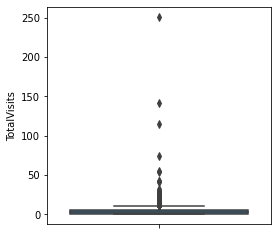

In [22]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['TotalVisits'], data=df)
plt.show()

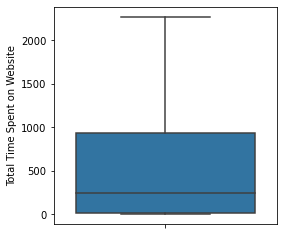

In [23]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['Total Time Spent on Website'], data=df)
plt.show()

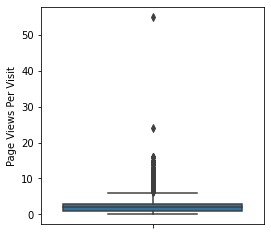

In [24]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['Page Views Per Visit'], data=df)
plt.show()

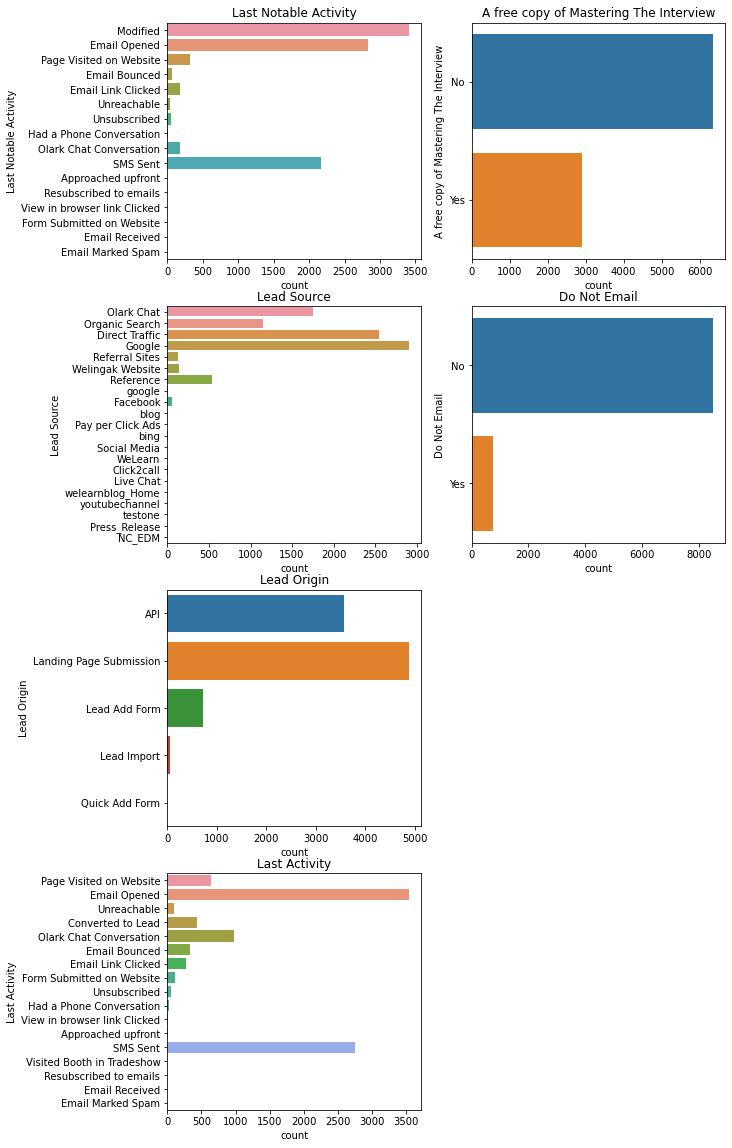

In [25]:
plt.figure(figsize = (10,20))

plt.subplot(4,2,1)
sns.countplot(y=df['Last Notable Activity'])
plt.title('Last Notable Activity')
 
plt.subplot(4,2,2)
sns.countplot(y=df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,3)
sns.countplot(y=df['Lead Source'])
plt.title('Lead Source')


plt.subplot(4,2,5)
sns.countplot(y=df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,4)
sns.countplot(y=df['Do Not Email'])
plt.title('Do Not Email')
plt.subplot(4,2,7)
sns.countplot(y=df['Last Activity'])
plt.title('Last Activity')


plt.show()


## Bi-Variate Analysis


In [26]:
def bivariate(a,b):
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=a, y=b, data=df)
    plt.show()

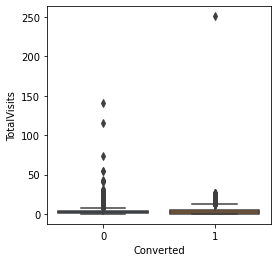

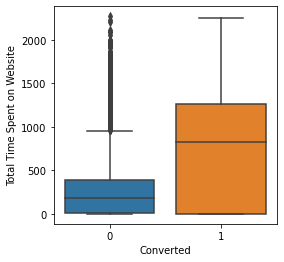

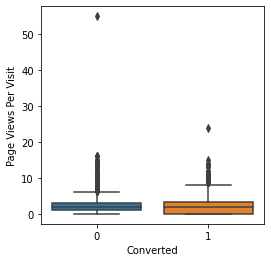

In [27]:
#making list of all numerical columns
num_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for c in num_col:
  bivariate('Converted',c)

In [28]:
def cat_bivariate(c1,c2):
    plt.figure(figsize = (4,6))
    sns.catplot(col=c1 ,y=c2, data=df, kind="count")
    plt.show()
     

     

In [29]:
cat_col=['Last Notable Activity','A free copy of Mastering The Interview','Lead Source','Lead Origin','Do Not Email','Last Activity']

<Figure size 288x432 with 0 Axes>

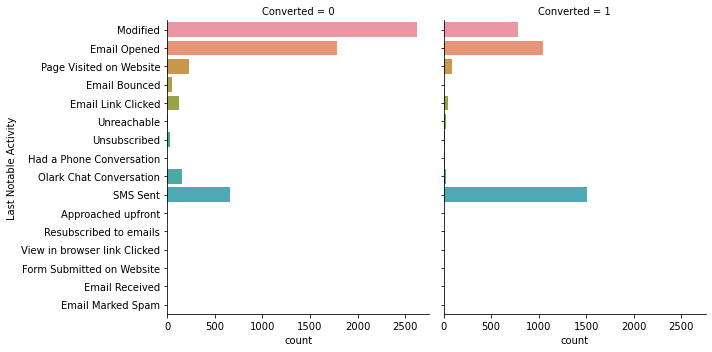

<Figure size 288x432 with 0 Axes>

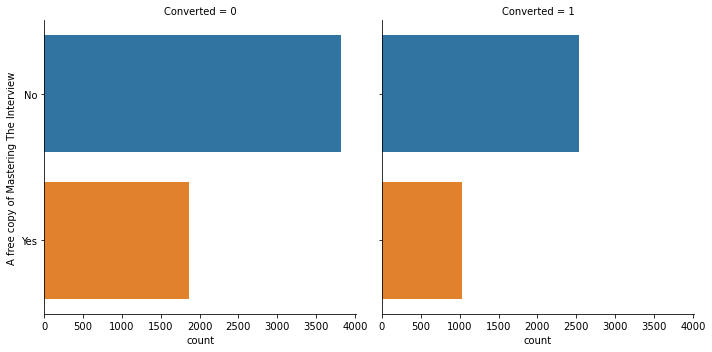

<Figure size 288x432 with 0 Axes>

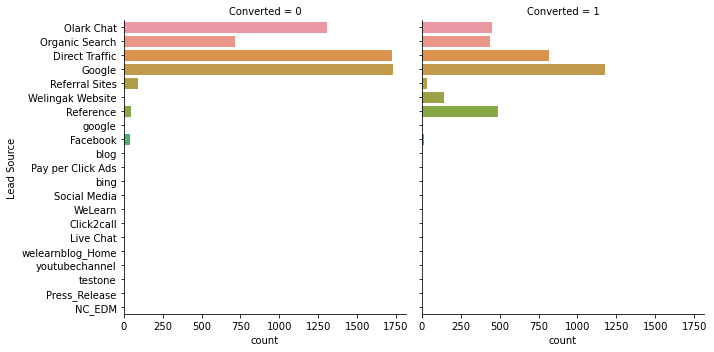

<Figure size 288x432 with 0 Axes>

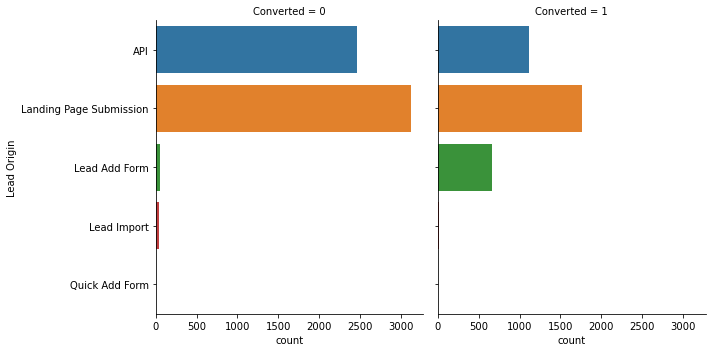

<Figure size 288x432 with 0 Axes>

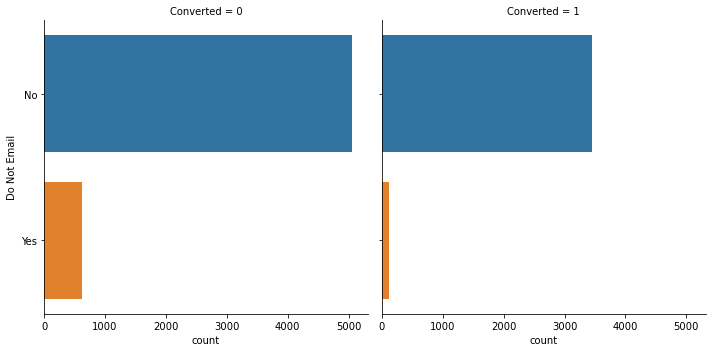

<Figure size 288x432 with 0 Axes>

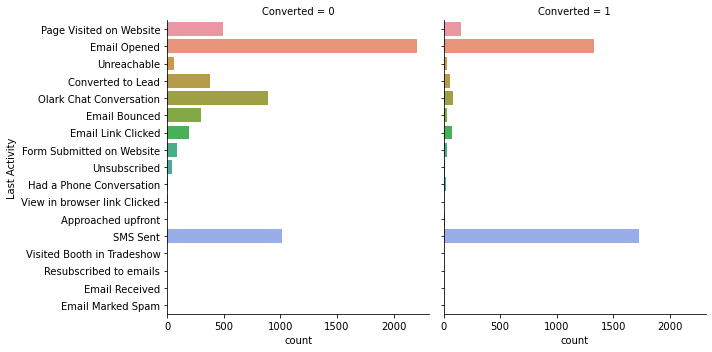

In [30]:
for b in cat_col:
    cat_bivariate('Converted',b)


### multivariate analysis

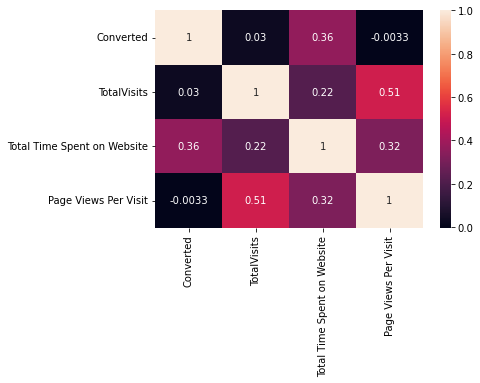

In [31]:
#plot heatmap for multivariate ana;ysis
sns.heatmap(df.corr(),annot=True)
plt.show()

# dummy variable

In [32]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df = pd.get_dummies(data=df, columns=list(cat_col), drop_first=True)
del cat_col
df_col = set(df.columns)

In [33]:
df.shape

(9240, 61)

In [34]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820,0.006494,0.018723,0.000216,0.305952,0.000108,0.000108,...,0.012554,0.003247,0.105303,0.069264,0.000108,0.297078,0.010065,0.006602,0.000649,0.000108
std,0.486714,4.818723,548.021466,2.145333,0.080325,0.135552,0.014711,0.460835,0.010403,0.010403,...,0.111346,0.056891,0.306960,0.253916,0.010403,0.456996,0.099823,0.080987,0.025475,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           9240 non-null   int64  
 1   TotalVisits                                         9240 non-null   float64
 2   Total Time Spent on Website                         9240 non-null   int64  
 3   Page Views Per Visit                                9240 non-null   float64
 4   Last Notable Activity_Email Bounced                 9240 non-null   uint8  
 5   Last Notable Activity_Email Link Clicked            9240 non-null   uint8  
 6   Last Notable Activity_Email Marked Spam             9240 non-null   uint8  
 7   Last Notable Activity_Email Opened                  9240 non-null   uint8  
 8   Last Notable Activity_Email Received                9240 non-null   uint8  
 9

In [36]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# spliting the data into train and test set

In [37]:
#import library
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
df_train, df_test= train_test_split(df, train_size=0.7, test_size=0.3,random_state=100)

### resacling
in this we use min-max scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
#create a list of numerical variable
num_var=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# fit on data
df_train[num_var]=scaler.fit_transform(df_train[num_var])

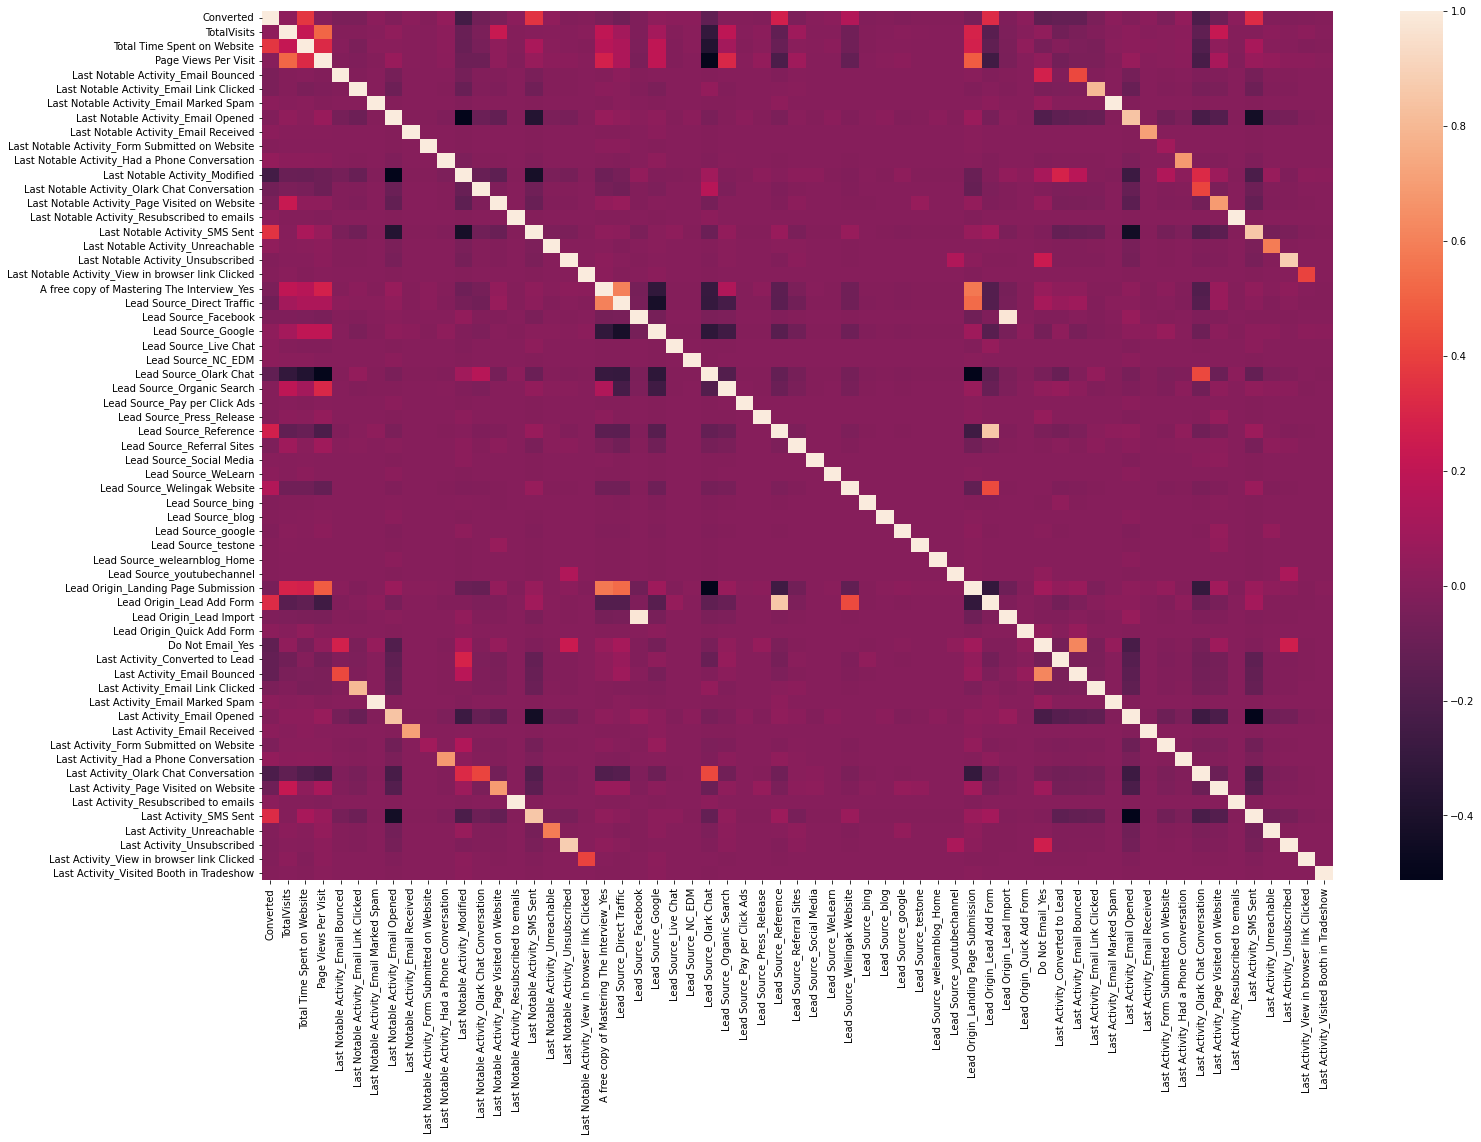

In [42]:
plt.figure(figsize=(24, 16))
sns.heatmap(df.corr())
plt.show()

## Building Model
NOTE: We will use Logistic Regression with RFE in order to build  suitable models:

    i) Model with Moderate Accuracy: To get wider range of audience to target upon
    ii)Model with High Accuracy: To get narrow range of audience to target upon

In [43]:
y_train= df_train.pop("Converted")
X_train=df_train
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
1871,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(lr, step= 20)
rfe = rfe.fit(X_train, y_train)


In [45]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Notable Activity_Email Bounced', False, 2),
 ('Last Notable Activity_Email Link Clicked', True, 1),
 ('Last Notable Activity_Email Marked Spam', False, 3),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Email Received', False, 2),
 ('Last Notable Activity_Form Submitted on Website', False, 3),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited on Website', True, 1),
 ('Last Notable Activity_Resubscribed to emails', True, 1),
 ('Last Notable Activity_SMS Sent', False, 2),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Last Notable Activity_Unsubscribed', False, 3),
 ('Last Notable Activity_View in browser link Clicked', False, 3),
 ('A free copy of Mastering The Interview_Yes', False, 3),


In [46]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
#All the variables selected by RFE, next statistics part (p-values and the VIFs)

# Selecting columns selected by RFE
X_train = X_train[col]

In [47]:
# Importing statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2828.5
Date:                Sun, 05 Mar 2023   Deviance:                       5657.0
Time:                        19:51:37   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3654
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5138      0.109     -4.722      0.000      -0.727      -0.301
TotalVisits                                        8.2190      2.313      3.554      0.000       3.686      12.752
Total Time Spent on Website                        4.6346      0.161     28.759      0.000       4.319       4.950
Page Views Per Visit                              -3.6474      1.259     -2.897      0.004      -6.115      -1.179
Last Notable Activity_Email Link Clicked          -1.2568      0.443     -2.836      0.005      -2.125      -0.388
Last Notable Activity_Email Opened                -1.3506      0.085    -15.959      0.000      -1.516      -1.185
Last Notable Activity_Had a Phone Conversation     0.8870      1.402      0.633      0.527      -1.861       3.634
Last Notable Activity_Modified                    -1.5795      0.104    -15.250      0.000      -1.783      -1.377
Last Notable Activity_Olark Chat Conversation     -1.3407      0.367     -3.650      0.000      -2.061      -0.621
Last Notable Activity_Page Visited on Website     -1.0832      0.292     -3.706      0.000      -1.656      -0.510
Last Notable Activity_Resubscribed to emails      11.0957   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Notable Activity_Unreachable                  1.5387      0.828      1.858      0.063      -0.085       3.162
Lead Source_Direct Traffic                        -0.3298      0.080     -4.123      0.000      -0.487      -0.173
Lead Source_NC_EDM                                22.4181   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                             0.8885      0.121      7.361      0.000       0.652       1.125
Lead Source_Reference                              0.9801      0.519      1.887      0.059      -0.038       1.998
Lead Source_Social Media                           2.1349      1.459      1.464      0.143      -0.724       4.994
Lead Source_Welingak Website                       2.4596      0.868      2.834      0.005       0.758       4.161
Lead Source_google                               -20.7125   2.01e+04     -0.001      0.999   -3.93e+04    3.93e+04
Lead Origin_Lead Add Form                          2.8654      0.491      5.833      0.000       1.903       3.828
Lead Origin_Quick Add Form                        22.7188   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email_Yes                                  -1.2971      0.191     -6.808      0.000      -1.671      -0.924
Last Activity_Converted to Lead                   -1.0656      0.219     -4.874      0.000      -1.494      -0.637
Last Activity_Email Bounced                       -1.2409      0.346     -3.590      0.000   

In [48]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,Last Activity_Resubscribed to emails,inf
9,Last Notable Activity_Resubscribed to emails,inf
18,Lead Origin_Lead Add Form,15.69
14,Lead Source_Reference,12.89
16,Lead Source_Welingak Website,3.77
6,Last Notable Activity_Modified,3.17
23,Last Activity_Email Link Clicked,3.05
2,Page Views Per Visit,3.04
3,Last Notable Activity_Email Link Clicked,3.04
27,Last Activity_Page Visited on Website,2.53


The VIF values seem fine but some p-values are 99 %. So removing 'Lead Source_google','Last Activity_Email Received'

In [49]:
X_train.drop(['Last Notable Activity_Resubscribed to emails','Lead Source_google','Last Activity_Email Received','Last Activity_Resubscribed to emails','Last Notable Activity_Resubscribed to emails','Lead Source_NC_EDM','Lead Origin_Quick Add Form'], axis = 1, inplace = True)

In [50]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.0
Date:                Sun, 05 Mar 2023   Deviance:                       5664.0
Time:                        19:51:38   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3647
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5111      0.109     -4.697      0.000      -0.724      -0.298
TotalVisits                                        8.2824      2.318      3.574      0.000       3.740      12.825
Total Time Spent on Website                        4.6463      0.161     28.839      0.000       4.330       4.962
Page Views Per Visit                              -3.7124      1.260     -2.945      0.003      -6.183      -1.242
Last Notable Activity_Email Link Clicked          -1.2545      0.443     -2.830      0.005      -2.123      -0.386
Last Notable Activity_Email Opened                -1.3518      0.085    -15.978      0.000      -1.518      -1.186
Last Notable Activity_Had a Phone Conversation     0.8893      1.402      0.634      0.526      -1.859       3.638
Last Notable Activity_Modified                    -1.5787      0.103    -15.260      0.000      -1.781      -1.376
Last Notable Activity_Olark Chat Conversation     -1.3407      0.367     -3.649      0.000      -2.061      -0.621
Last Notable Activity_Page Visited on Website     -1.0660      0.292     -3.651      0.000      -1.638      -0.494
Last Notable Activity_Unreachable                  1.6336      0.824      1.984      0.047       0.020       3.248
Lead Source_Direct Traffic                        -0.3329      0.080     -4.162      0.000      -0.490      -0.176
Lead Source_Olark Chat                             0.8890      0.121      7.367      0.000       0.652       1.125
Lead Source_Reference                              0.9881      0.518      1.906      0.057      -0.028       2.004
Lead Source_Social Media                           2.1441      1.461      1.468      0.142      -0.718       5.007
Lead Source_Welingak Website                       2.4656      0.867      2.843      0.004       0.766       4.166
Lead Origin_Lead Add Form                          2.8554      0.490      5.826      0.000       1.895       3.816
Do Not Email_Yes                                  -1.2974      0.190     -6.813      0.000      -1.671      -0.924
Last Activity_Converted to Lead                   -1.0704      0.219     -4.895      0.000      -1.499      -0.642
Last Activity_Email Bounced                       -1.1989      0.340     -3.524      0.000      -1.866      -0.532
Last Activity_Email Link Clicked                  -0.6021      0.361     -1.667      0.096      -1.310       0.106
Last Activity_Had a Phone Conversation             0.9995      0.878      1.138      0.255      -0.722       2.721
Last Activity_Olark Chat Conversation             -1.4404      0.193     -7.448      0.000      -1.819      -1.061
Last Activity_Page Visited on Website             -0.7575      0.220     -3.443      0.001   

In [51]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
15,Lead Origin_Lead Add Form,15.69
12,Lead Source_Reference,12.89
14,Lead Source_Welingak Website,3.77
6,Last Notable Activity_Modified,3.17
19,Last Activity_Email Link Clicked,3.05
2,Page Views Per Visit,3.04
3,Last Notable Activity_Email Link Clicked,3.04
22,Last Activity_Page Visited on Website,2.52
8,Last Notable Activity_Page Visited on Website,2.37
21,Last Activity_Olark Chat Conversation,2.15


In [52]:
X_train.drop(['Lead Origin_Lead Add Form','Lead Source_Reference'],1,inplace=True)

In [53]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3109.1
Date:                Sun, 05 Mar 2023   Deviance:                       6218.2
Time:                        19:51:38   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3079
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.7595      0.090      8.461      0.000       0.584       0.935
TotalVisits                                        5.0262      2.078      2.419      0.016       0.953       9.099
Total Time Spent on Website                        3.9470      0.150     26.312      0.000       3.653       4.241
Page Views Per Visit                             -14.3338      1.209    -11.857      0.000     -16.703     -11.964
Last Notable Activity_Email Link Clicked          -0.9596      0.413     -2.324      0.020      -1.769      -0.150
Last Notable Activity_Email Opened                -1.4204      0.081    -17.550      0.000      -1.579      -1.262
Last Notable Activity_Had a Phone Conversation     0.0422      1.339      0.031      0.975      -2.582       2.666
Last Notable Activity_Modified                    -1.4282      0.095    -15.054      0.000      -1.614      -1.242
Last Notable Activity_Olark Chat Conversation     -0.9378      0.343     -2.738      0.006      -1.609      -0.266
Last Notable Activity_Page Visited on Website     -0.9309      0.277     -3.365      0.001      -1.473      -0.389
Last Notable Activity_Unreachable                  1.3970      0.720      1.941      0.052      -0.014       2.808
Lead Source_Direct Traffic                        -0.7515      0.076     -9.921      0.000      -0.900      -0.603
Lead Source_Olark Chat                            -0.2916      0.103     -2.821      0.005      -0.494      -0.089
Lead Source_Social Media                           1.6849      1.447      1.164      0.244      -1.152       4.522
Lead Source_Welingak Website                       4.0691      0.723      5.625      0.000       2.651       5.487
Do Not Email_Yes                                  -1.2243      0.176     -6.954      0.000      -1.569      -0.879
Last Activity_Converted to Lead                   -1.7457      0.210     -8.325      0.000      -2.157      -1.335
Last Activity_Email Bounced                       -1.2505      0.300     -4.170      0.000      -1.838      -0.663
Last Activity_Email Link Clicked                  -0.7839      0.338     -2.321      0.020      -1.446      -0.122
Last Activity_Had a Phone Conversation             1.5691      0.747      2.100      0.036       0.105       3.033
Last Activity_Olark Chat Conversation             -1.7819      0.188     -9.460      0.000      -2.151      -1.413
Last Activity_Page Visited on Website             -0.9690      0.210     -4.625      0.000      -1.380      -0.558
Last Activity_Unreachable                         -1.3440      0.524     -2.567      0.010      -2.370      -0.318
=============================================================================================

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
17,Last Activity_Email Link Clicked,3.04
3,Last Notable Activity_Email Link Clicked,3.02
2,Page Views Per Visit,3.01
6,Last Notable Activity_Modified,2.98
20,Last Activity_Page Visited on Website,2.51
8,Last Notable Activity_Page Visited on Website,2.35
19,Last Activity_Olark Chat Conversation,2.13
5,Last Notable Activity_Had a Phone Conversation,2.02
18,Last Activity_Had a Phone Conversation,2.02
0,TotalVisits,2.00


In [55]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'],1,inplace=True)

In [56]:
X_train_sm = sm.add_constant(X_train)
lm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3109.1
Date:                Sun, 05 Mar 2023   Deviance:                       6218.2
Time:                        19:51:38   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3079
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.7595      0.090      8.464      0.000       0.584       0.935
TotalVisits                                       5.0279      2.078      2.420      0.016       0.956       9.100
Total Time Spent on Website                       3.9469      0.150     26.313      0.000       3.653       4.241
Page Views Per Visit                            -14.3335      1.209    -11.857      0.000     -16.703     -11.964
Last Notable Activity_Email Link Clicked         -0.9598      0.413     -2.325      0.020      -1.769      -0.151
Last Notable Activity_Email Opened               -1.4204      0.081    -17.563      0.000      -1.579      -1.262
Last Notable Activity_Modified                   -1.4284      0.095    -15.094      0.000      -1.614      -1.243
Last Notable Activity_Olark Chat Conversation    -0.9380      0.342     -2.739      0.006      -1.609      -0.267
Last Notable Activity_Page Visited on Website    -0.9311      0.277     -3.367      0.001      -1.473      -0.389
Last Notable Activity_Unreachable                 1.3968      0.720      1.940      0.052      -0.014       2.808
Lead Source_Direct Traffic                       -0.7515      0.076     -9.922      0.000      -0.900      -0.603
Lead Source_Olark Chat                           -0.2916      0.103     -2.821      0.005      -0.494      -0.089
Lead Source_Social Media                          1.6849      1.447      1.164      0.244      -1.152       4.522
Lead Source_Welingak Website                      4.0691      0.723      5.625      0.000       2.651       5.487
Do Not Email_Yes                                 -1.2244      0.176     -6.957      0.000      -1.569      -0.879
Last Activity_Converted to Lead                  -1.7456      0.210     -8.326      0.000      -2.156      -1.335
Last Activity_Email Bounced                      -1.2503      0.300     -4.170      0.000      -1.838      -0.663
Last Activity_Email Link Clicked                 -0.7838      0.338     -2.321      0.020      -1.446      -0.122
Last Activity_Had a Phone Conversation            1.5823      0.619      2.556      0.011       0.369       2.796
Last Activity_Olark Chat Conversation            -1.7818      0.188     -9.461      0.000      -2.151      -1.413
Last Activity_Page Visited on Website            -0.9689      0.209     -4.625      0.000      -1.379      -0.558
Last Activity_Unreachable                        -1.3439      0.523     -2.567      0.010      -2.370      -0.318
=================================================================================================================
"""

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Activity_Email Link Clicked,3.04
3,Last Notable Activity_Email Link Clicked,3.02
2,Page Views Per Visit,3.01
5,Last Notable Activity_Modified,2.96
19,Last Activity_Page Visited on Website,2.51
7,Last Notable Activity_Page Visited on Website,2.35
18,Last Activity_Olark Chat Conversation,2.13
0,TotalVisits,2.00
13,Do Not Email_Yes,1.89
15,Last Activity_Email Bounced,1.89


All the VIF values are less than 5 and all the p-values are below 0.05. So we  fixed model.

# making prediction

In [58]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

1871    0.278382
6795    0.303040
3516    0.210864
8105    0.844673
3934    0.276793
dtype: float64

In [59]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
1871,0,0.278382
6795,0,0.303040
3516,0,0.210864
8105,0,0.844673
3934,0,0.276793


In [60]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
1871,0,0.278382,0
6795,0,0.303040,0
3516,0,0.210864,0
8105,0,0.844673,1
3934,0,0.276793,0


# Model Evaluation

In [61]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3436,  566],
       [ 898, 1568]], dtype=int64)

In [62]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7736549165120594

That's around 77% accuracy and it is quite  good value

In [63]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]
# Calculating the sensitivity
TP/(TP+FN)

0.6358475263584753

In [64]:
# Calculating the specificity
TN/(TN+FP)

0.8585707146426786

we have around 77% accuracy, sensitivity of around 63% and specificity of around 86%.

# ROC Curve


In [65]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate ]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

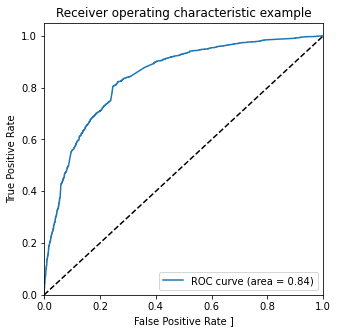

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [67]:
# Creating columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.278382,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.303040,0,1,1,1,1,0,0,0,0,0,0
3516,0,0.210864,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.844673,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.276793,0,1,1,1,0,0,0,0,0,0,0


In [68]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probabiltity','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,probabiltity,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.557205,0.972830,0.301099
0.2,0.2,0.661255,0.932685,0.494003
0.3,0.3,0.762059,0.832522,0.718641
0.4,0.4,0.767934,0.706407,0.805847
0.5,0.5,0.773655,0.635848,0.858571
0.6,0.6,0.769481,0.557989,0.899800
0.7,0.7,0.720470,0.352393,0.947276
0.8,0.8,0.692795,0.241281,0.971014
0.9,0.9,0.659246,0.120843,0.991004


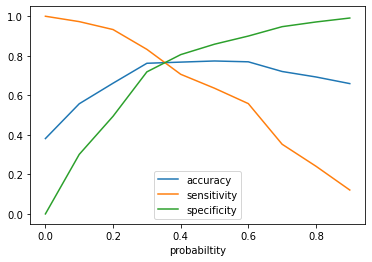

In [69]:
# Plotting above data
cutoff_df.plot.line(x='probabiltity', y=['accuracy','sensitivity','specificity'])
plt.show()

from above graph we conclude that optimal cut off if around .37

In [70]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.278382,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.303040,0,1,1,1,1,0,0,0,0,0,0,0
3516,0,0.210864,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.844673,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.276793,0,1,1,1,0,0,0,0,0,0,0,0


In [71]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)



0.7600494743351887

In [72]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3078,  924],
       [ 628, 1838]], dtype=int64)

In [73]:

# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [74]:
# Calculating the sensitivity
TP/(TP+FN)


0.7453365774533658

In [75]:

# Calculating the specificity
TN/(TN+FP)

0.7691154422788605

# Prediction on test set


In [76]:
y_test=df_test.pop('Converted')
X_test=df_test


In [77]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
col = X_train.columns

In [78]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,...,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable
4269,1.0,0.031873,0.444982,0.145455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,1.0,0.019920,0.025968,0.090909,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9199,1.0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4359,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0.027273,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2152,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7101,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5331,1.0,0.011952,0.707746,0.054545,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [79]:
# Store the prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to data frame
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.460020
1,1,0.681255
2,1,0.428514
3,0,0.060527
4,1,0.340537


In [80]:
# Making prediction using cut off 0.35
y_pred_final['final_pred'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_pred
0,1,0.460020,1
1,1,0.681255,1
2,1,0.428514,0
3,0,0.060527,0
4,1,0.340537,0
...,...,...,...
2767,0,0.185633,0
2768,1,0.681255,1
2769,0,0.278382,0
2770,0,0.176247,0


In [81]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_pred)


0.7698412698412699

In [82]:

# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_pred )
confusion2


array([[1402,  275],
       [ 363,  732]], dtype=int64)

In [83]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [84]:
# Calculating the sensitivity
TP/(TP+FN)


0.6684931506849315

In [85]:

# Calculating the specificity
TN/(TN+FP)

0.8360166964818128

Precesion and recall

In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion



array([[3436,  566],
       [ 898, 1568]], dtype=int64)

In [87]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])




0.7347703842549204

In [88]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6358475263584753

In [89]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     0
 79      1
 8039    0
 6936    0
 5640    0
 Name: Predicted, Length: 6468, dtype: int64)

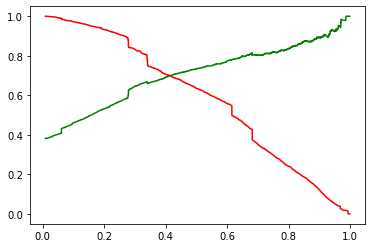

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [91]:
# Making prediction using cut off 0.44
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.278382,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.303040,0,1,1,1,1,0,0,0,0,0,0,0
3516,0,0.210864,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.844673,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.276793,0,1,1,1,0,0,0,0,0,0,0,0


In [92]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7730364873222016

In [93]:

# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3317,  685],
       [ 783, 1683]], dtype=int64)

In [94]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
# Precision = TP / TP + FP
TP / (TP + FP)

0.7107263513513513

In [95]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6824817518248175

With the current cut off as 0.44 we have Precision around 71% and Recall around 68.3% and accuracy 77 %.

In [96]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_pred,final_predicted
0,1,0.460020,1,1
1,1,0.681255,1,1
2,1,0.428514,0,0
3,0,0.060527,0,0
4,1,0.340537,0,0
...,...,...,...,...
2767,0,0.185633,0,0
2768,1,0.681255,1,1
2769,0,0.278382,0,0
2770,0,0.176247,0,0


In [97]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)



0.7698412698412699

In [98]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1402,  275],
       [ 363,  732]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
# Precision = TP / TP + FP
TP / (TP + FP)

0.7269116186693148

In [100]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6684931506849315

With the current cut off as 0.41 we have Precision around 72.69% , Recall around 66.84% and accuracy 76.5%.